# Signalaufnahme: Sampling

Wir importieren hier die Bibliotheken numpy und matplotlib; damit haben wir Zugriff auf erweiterte Datenstrukturen, Konstanten und Plots.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### Einfache Signale
Wir simulieren hier ein einfaches Signal durch eine harmonische Schwingung. Dieses kann durch den Sinus oder den Kosinus beschrieben werden. 

Unser Signal besitzt eine Frequenz von 2 Hz (sofern man die x-Achse als Zeit in Sekunden versteht); das heißt also, dass 2 vollständige Perioden in einer Sekunde durchlaufen werden. 

Wir simulieren einen Zeitraum von 3 Sekunden durch 3000 Werte - damit ist die Rate des fiktiven Signals so hoch, dass wir __im Kontext dieser Übung so tun__, als handele es sich um ein "echtes" (d. h. nur in der Zeit von analog nach digital gewandeltes) Signal mit kontinuierlichem Wertebereich.

Die _Samplingtiefe_ (y-Achse) ist hier implizit durch die Genauigkeit der Fließkomma-Variblen gegeben.

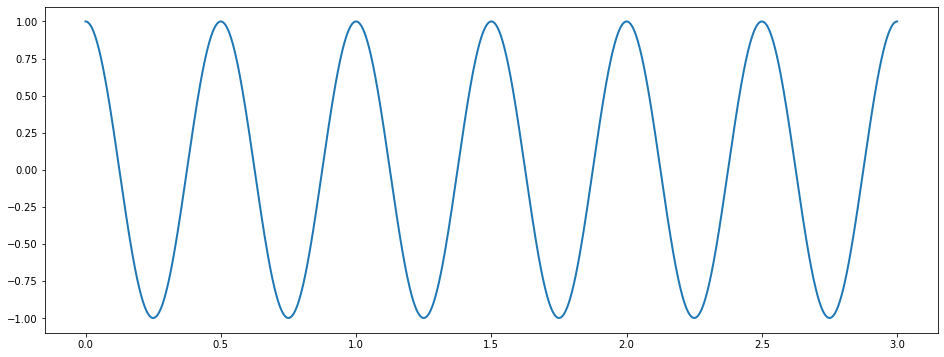

In [13]:
# Skalieren der Plot-Größe
plt.rcParams['figure.figsize'] = [16, 6]
# Signal
freq = 2 # Hz
xmax = 3.00001
x = np.arange(0.0, xmax, 1/1000)
y = np.cos(2*np.pi*freq*x)

# Signalvisualisierung
plt.plot(x, y, lw=2)

Im nächsten Plot legen wir nun über unser Ausgangssignal ein zweites, das das Ergebnis der _Digitalisierung_ des ersten darstellt; unser _Messsignal_. Die _Sampling-Frequenz_ bestimmt, wie oft (pro Sekunde) wir unser hoch aufgelöstes Signal messen.

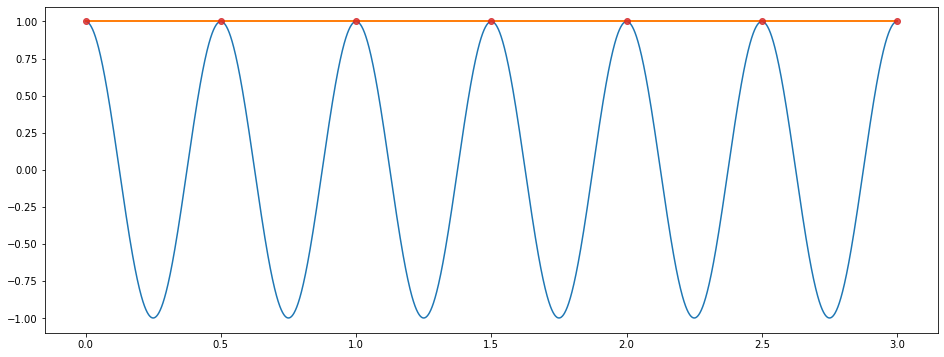

In [5]:
fs =  2

s = np.arange(0.0, xmax, 1/fs)
y2 = np.cos(2*np.pi*2*s)

# Signalvisualisierung
plt.plot(x,y)
plt.step(s,y2,where='post',lw=2) # Stufen-Funktion: Hält Werte bis zum darauffolgenden (post), 'where' ändert das Verhalten
plt.plot(s,y2, 'C3o', alpha=0.8) # Plottet Punkte einer bestimmten Farbe

__Q1:__ Bewerten Sie das aus dem Abtastvorgang resultierende zweite Signal. Wie gut gibt es das Ursprungssignal wieder? 
    Was könnten Sie ändern um die Qualität des digitalisierten Signals zu erhöhen?
    Passen Sie den Code an, so dass Sie das Ausgangssignal besser aus dem Messsignal rekonstruieren können.
    
**A1:** Das Abtastsignal ist nicht in der Lage das Ausgangssignal korrekt wiederzugeben. Die Sampling-Frequenz ist so niedrig, dass wir nur Zeitpunkte abtasten, an denen der Wert 1 angenommen wird; wir "verpassen" sämtliche andere Werte unserer periodischen Funktion. Mit einer höheren Sampling-Frequenz könnten wir mehr Werte jeder Periode abtasten und würden somit bemerken, dass das Signal nicht konstant 1 ist.

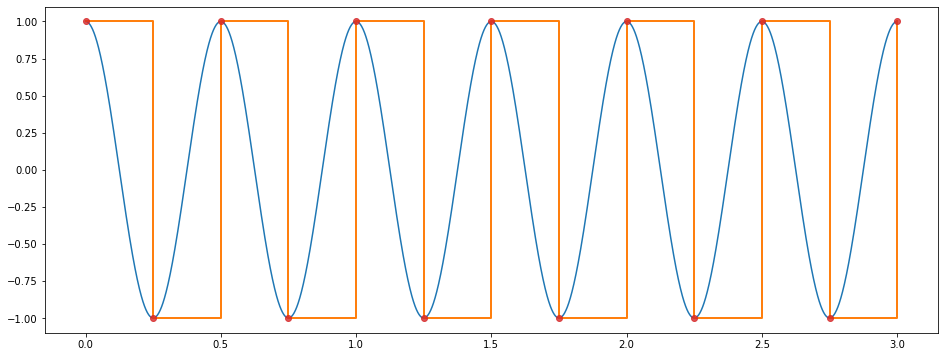

In [7]:
# Signal
fs =  4

s = np.arange(0.0, xmax, 1/fs)
y2 = np.cos(2*np.pi*2*s)

# Signalvisualisierung
plt.plot(x,y)
plt.step(s,y2,where='post',lw=2)
plt.plot(s,y2, 'C3o', alpha=0.8)

Als nächstes betrachten wir eine Variante des Ausgangssignals, die zeitlich verschoben ist. Die Frequenz ist dieselbe.

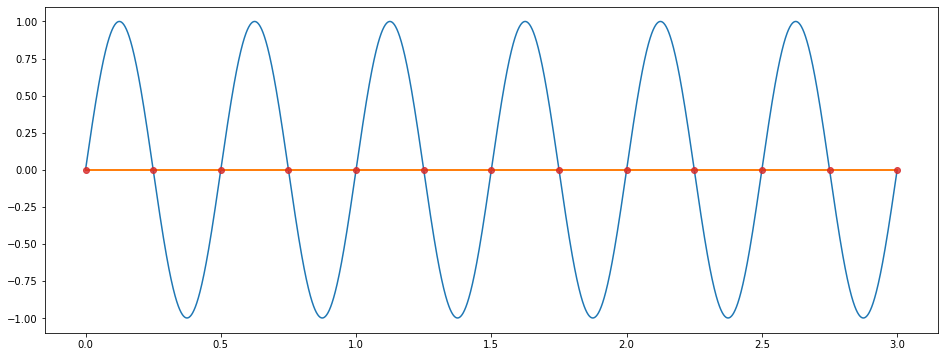

In [8]:
y = np.sin(2*np.pi*2*x)
fs =  4

s = np.arange(0.0, xmax, 1/fs)
y2 = np.sin(2*np.pi*2*s)


plt.plot(x,y)
plt.step(s,y2,where='post',lw=2)
plt.plot(s,y2, 'C3o', alpha=0.8)


__Q2:__ Was fällt Ihnen auf? Müssen Sie noch etwas anpassen? Welche (allgemeine) Schlussfolgerung können Sie daraus ziehen?

**A2:** Bei gleicher Samplingrate können wir hier wieder nicht erfassen, dass eine Schwingung vorliegt. Das liegt offensichtlich daran, dass unsere Abtastzeitpunkte ungünstig liegen (der Wert 0 wird doppelt so häufig angenommen wie der Wert 1, daher reicht die doppelte Sampling-Frequenz hier nicht aus). Die _Nyquist-Rate_ ist nur ein theoretisches Minimum, bietet aber keine Garantie einer ausreichenden Sampling-Frequenz! Wir müssen die Sampling-Frequenz also weiter erhöhen, da wir nicht allgemein wissen können zu welchen Zeitpunkten wir abtasten müssen.

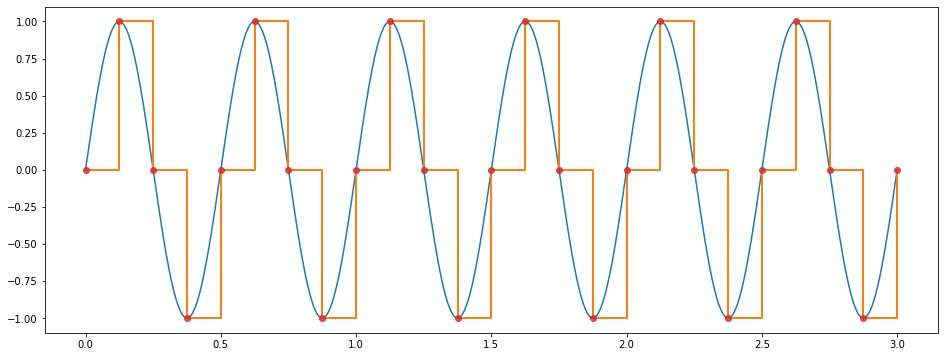

In [9]:
y = np.sin(2*np.pi*2*x)
fs =  8

s = np.arange(0.0, xmax, 1/fs)
y2 = np.sin(2*np.pi*2*s)


plt.plot(x,y)
plt.step(s,y2,where='post',lw=2)
plt.plot(s,y2, 'C3o', alpha=0.8)

Bisher haben wir nur Signale mit einer einzelnen Schwingungsfrequenz betrachtet. Im letzten Beispiel sehen Sie eine Überlagerung durch eine typische Störquelle ("_Netzbrummen_"). Mit dem bloßen Auge sollten Sie das Nutzsignal von vorhin und seine Frequenz von 2 Hz allerdings noch erkennen können.

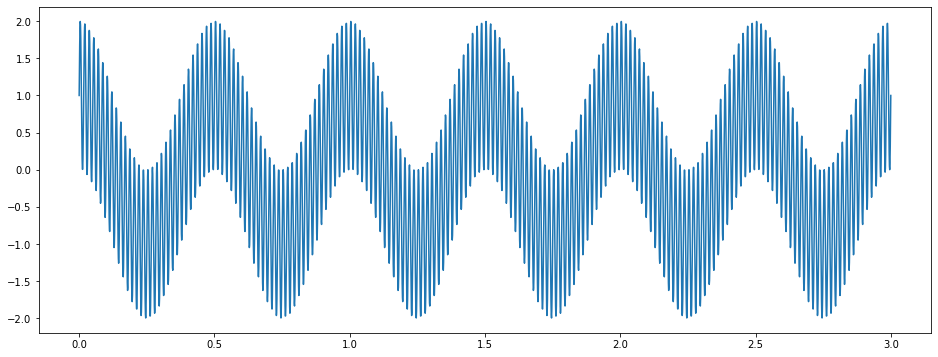

In [10]:
x = np.arange(0.0, xmax, 1/1000)
y = np.cos(2*np.pi*2*x)+np.sin(2*np.pi*60*x)
plt.plot(x,y)

__Q3:__ Passen Sie auch hier die Darstellung des Abtastvorganges wie oben an. Versuchen Sie das Nutzsignal so gut wie möglich abzutasten. Welche Schwierigkeiten entstehen?

**A3:** Da das Störsignal hier eine höhere Frequenz hat als unser Nutzsignal können wir nicht einfach ein Vielfaches der Nutzfrequenz für das Sampling verwenden. Die maximale Frequenz für die Berechnung der Nyquist-Rate wäre eben die Störfrequenz. Vielfache dieser Frequenz liefern hingegen wieder gute Ergebnisse. Allgemein sollte man sicherstellen, dass keine höheren Frequenzen als die gesuchten im Signal enthalten sind - dann ist es einfacher eine ausreichende Sampling-Frequenz zu finden und keine Fehler beim Sampling zu machen (allgemein kennt man schließlich sein Nutzsignal nicht exakt!).

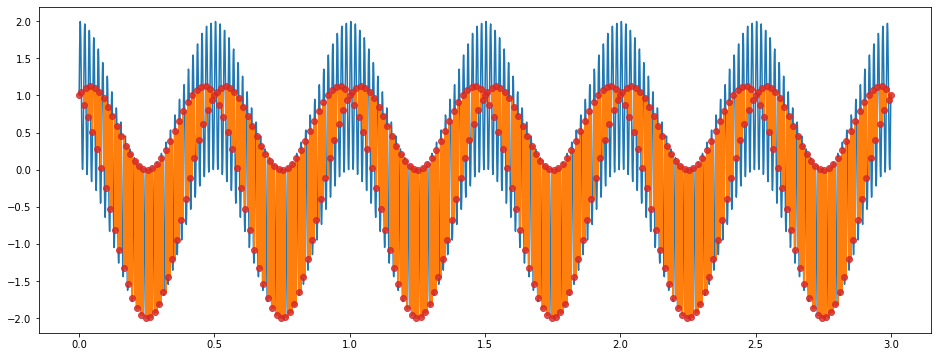

In [11]:
fs =  122 # schlecht

s = np.arange(0.0, xmax, 1/fs)
y2 = np.cos(2*np.pi*2*s)+np.sin(2*np.pi*60*s)
plt.plot(x,y)
plt.step(s,y2,where='post',lw=2)
plt.plot(s,y2, 'C3o', alpha=0.8)

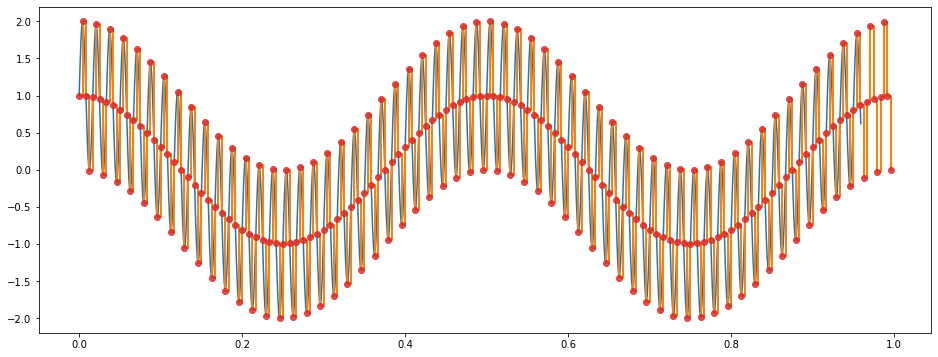

In [12]:
fs =  240 # gut

s = np.arange(0.0, xmax, 1/fs)
y2 = np.cos(2*np.pi*2*s)+np.sin(2*np.pi*60*s)

# Zoom:
plt.plot(x[0:4*fs],y[0:4*fs])
plt.step(s[0:fs],y2[0:fs],where='post',lw=2)
plt.plot(s[0:fs],y2[0:fs], 'C3o', alpha=0.8)

Vielleicht haben Sie gemerkt, dass gemeinsame Vielfache beider Frequenzen (z.B. 60 Hz, 120 Hz, oder auch 30 Hz) in diesem Fall in der Lage sind nur das gewünschte Signal zu samplen - denken Sie dabei an Aufgabe Q1. Weichen Sie leicht von dieser Frequenz ab, sieht das Ergebnis allerdings nicht mehr wie gewünscht aus. In der Praxis ist das Wissen über ein gemessenes Signal jedoch begrenzt; dennoch müssen bei der Signalaufnahme einige Annahmen getroffen werden. Stellen Sie sich vor, dass in einem echten Signal noch viele weitere Signalanteile enthalten sind, die aus den verschiedensten Schwingungen unterschiedlicher Freqenzen zusammengesetzt sind...